# Importing all necessary libraries and requirements

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline # used so that all plots and graphs are in the notebook itself

df = pd.read_csv("bankloans.csv")
df.head() #first 5 entries of dataset

# To check if there is any null values present

df.isnull().sum()
# above function returns all columns with number of null values each col has

In [14]:
df.value_counts()
# count the frequency of unique values

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [15]:
df = df.dropna()
# used to remove missing values

# Now the dataset is clean

# Visualizing Data

Age vs Income Chart

<Axes: xlabel='age', ylabel='income'>

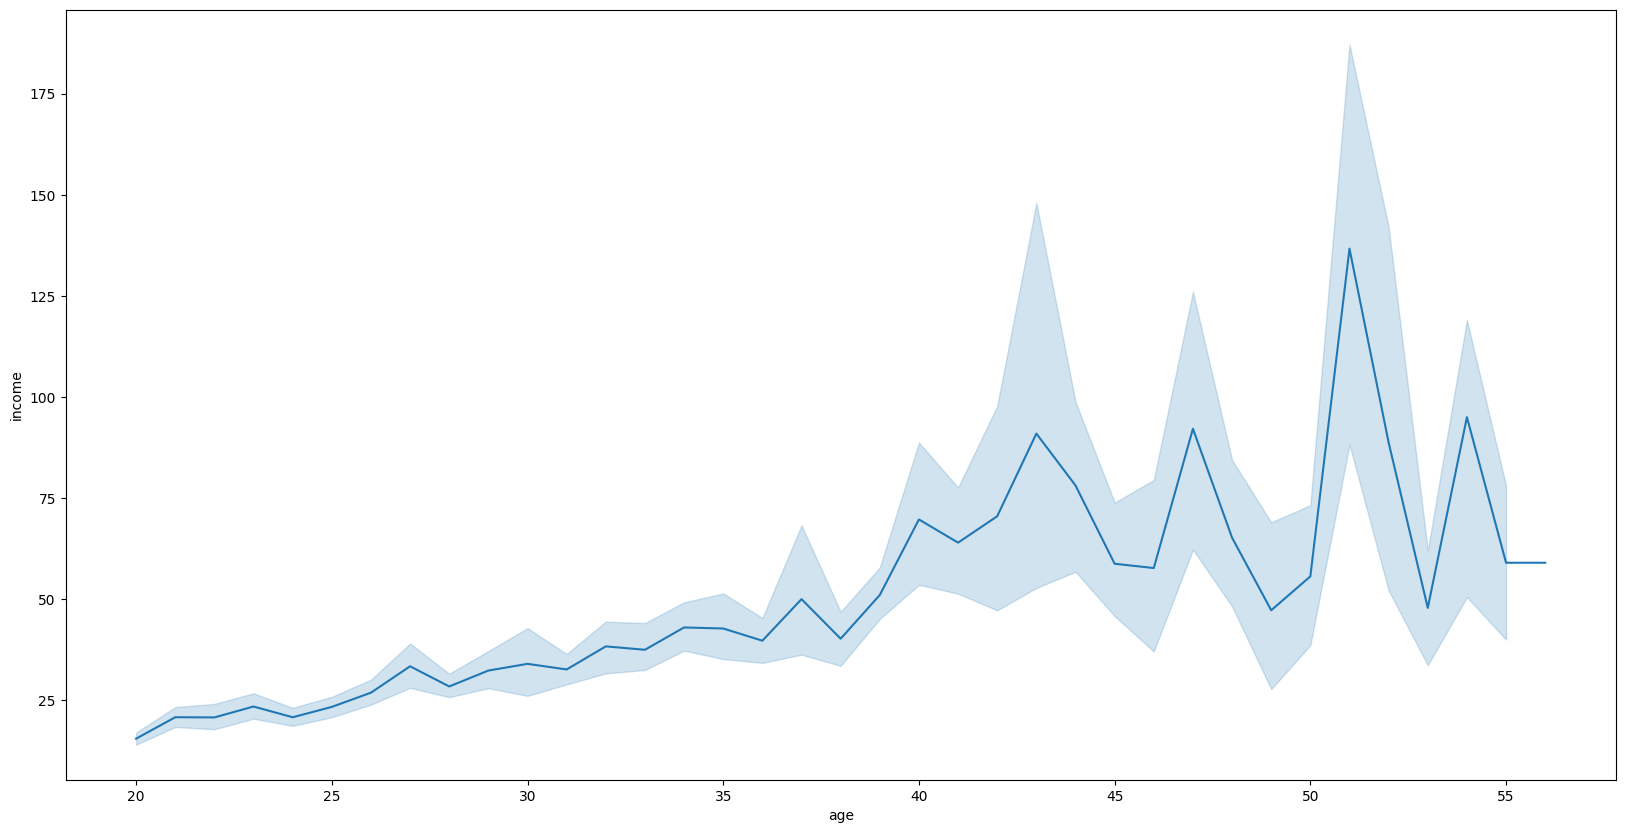

In [18]:
fig,ax = plt.subplots(figsize=(20,10)) 
# figure, axis and subplots plots the figure where size is rows, cols
sns.lineplot(x='age', y='income', data = df, ax=ax)
# linechart of age vs income and axis = ax

Income vs DebtToIncomeRatio Chart

<Axes: xlabel='income', ylabel='debtinc'>

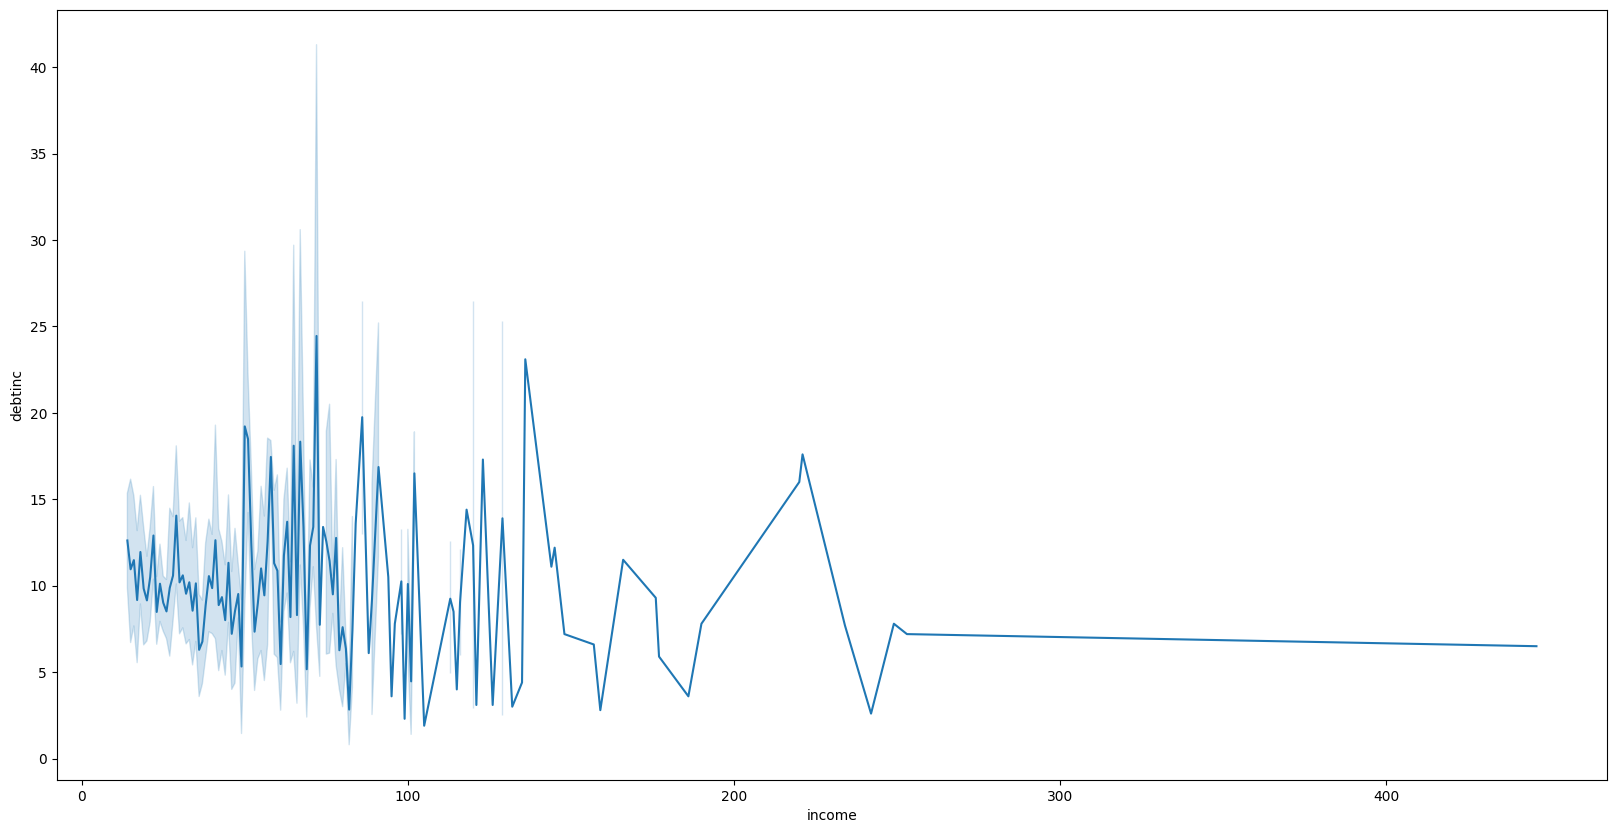

In [19]:
fig,ax = plt.subplots(figsize=(20,10)) 
sns.lineplot(x='income', y='debtinc', data = df, ax=ax)

Age vs DebtToIncomeRatio Chart

<Axes: xlabel='age', ylabel='debtinc'>

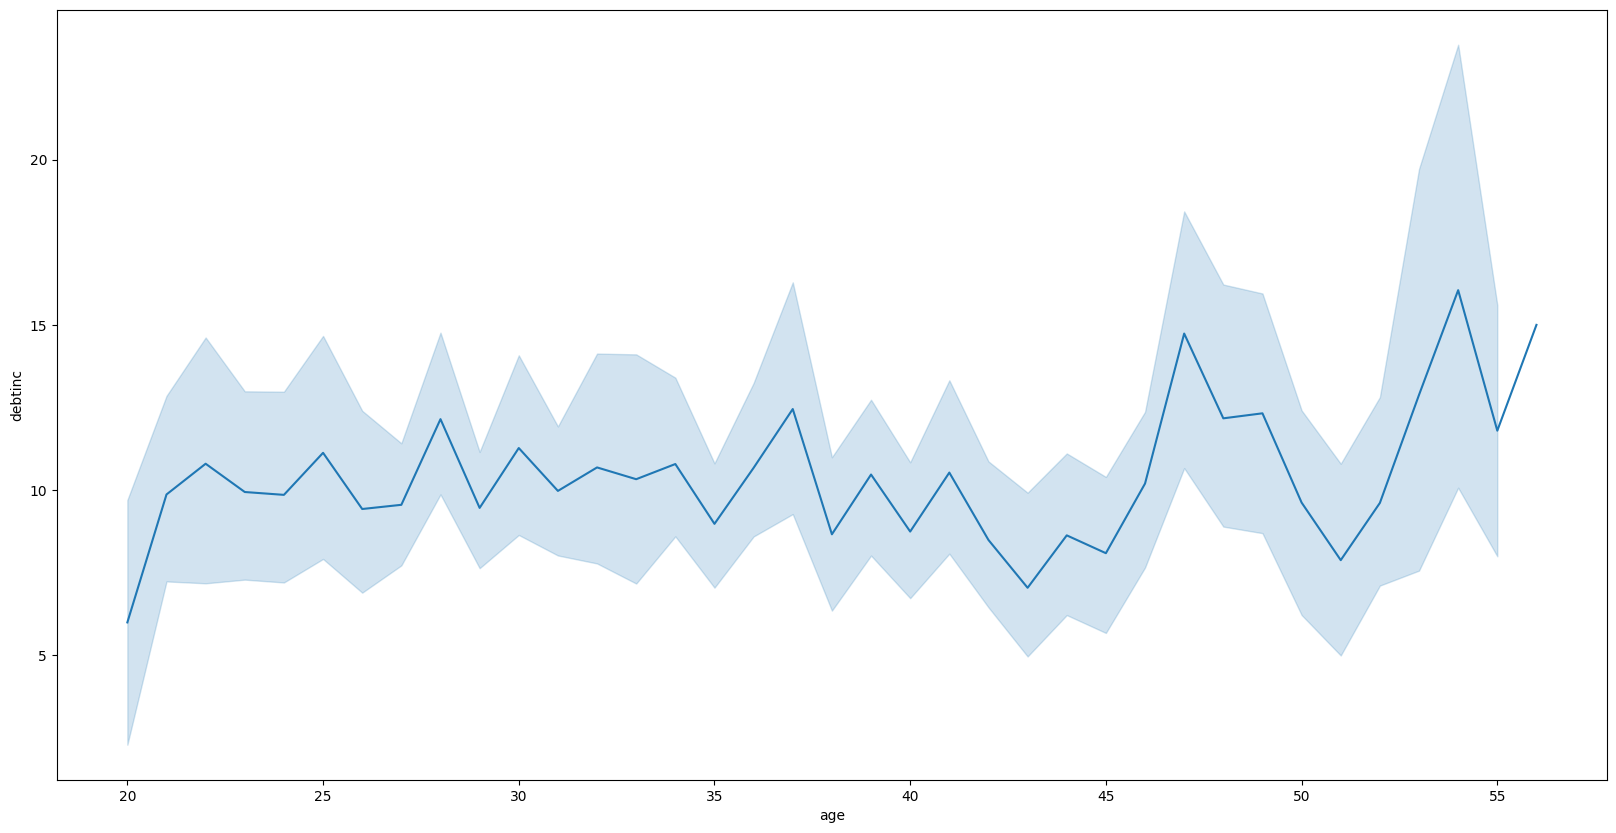

In [20]:
fig,ax = plt.subplots(figsize=(20,10)) 
sns.lineplot(x='age', y='debtinc', data = df, ax=ax)

# Looking at what to predict

In [22]:
df['default'].value_counts()
# value_counts gives all possible outcomes and their frequencies

default
0.0    517
1.0    183
Name: count, dtype: int64

In [24]:
x = df.drop(['default'], axis=1)
y = df['default']

In [27]:
# TrainTestSplit is used to divide the data randomly between training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# test_size tells the percentage in which data is split and random_state ensures that data is distributed randomly through the 4 categories

In [28]:
# StandardScalar is used to scale the values or we can say bring all the values within a certain range for the model to work properly
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# **Creating Model**

 Random Forest

In [29]:
rfc = RandomForestClassifier(n_estimators=200)
# 200 decision trees are present in the random forest

In [33]:
rfc.fit(x_train, y_train) #model training

RandomForestClassifier(n_estimators=200)

In [34]:
rfc.score(x_test, y_test) #model testing

0.8071428571428572

In [35]:
rfc2 = cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=10)
rfc2.mean()
# now the same random forest classifier goes through same data for 10 times so that every parameter is analysed properly and mean() averages out all the results

0.7839285714285714

Support Vector Machine

In [36]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [37]:
sv.score(x_test, y_test)

0.7928571428571428

In [39]:
# GridSearchCV is used to get the paramters in SVM
model = GridSearchCV(sv, {
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0], # value of C ranges from 0 to 10-20
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
}, scoring='accuracy',cv=10)

In [40]:
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [41]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [42]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(x_train,y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [43]:
model2.score(x_test,y_test)

0.8214285714285714

Logistic Regression

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
lr.score(x_test,y_test)

0.8357142857142857

<Axes: >

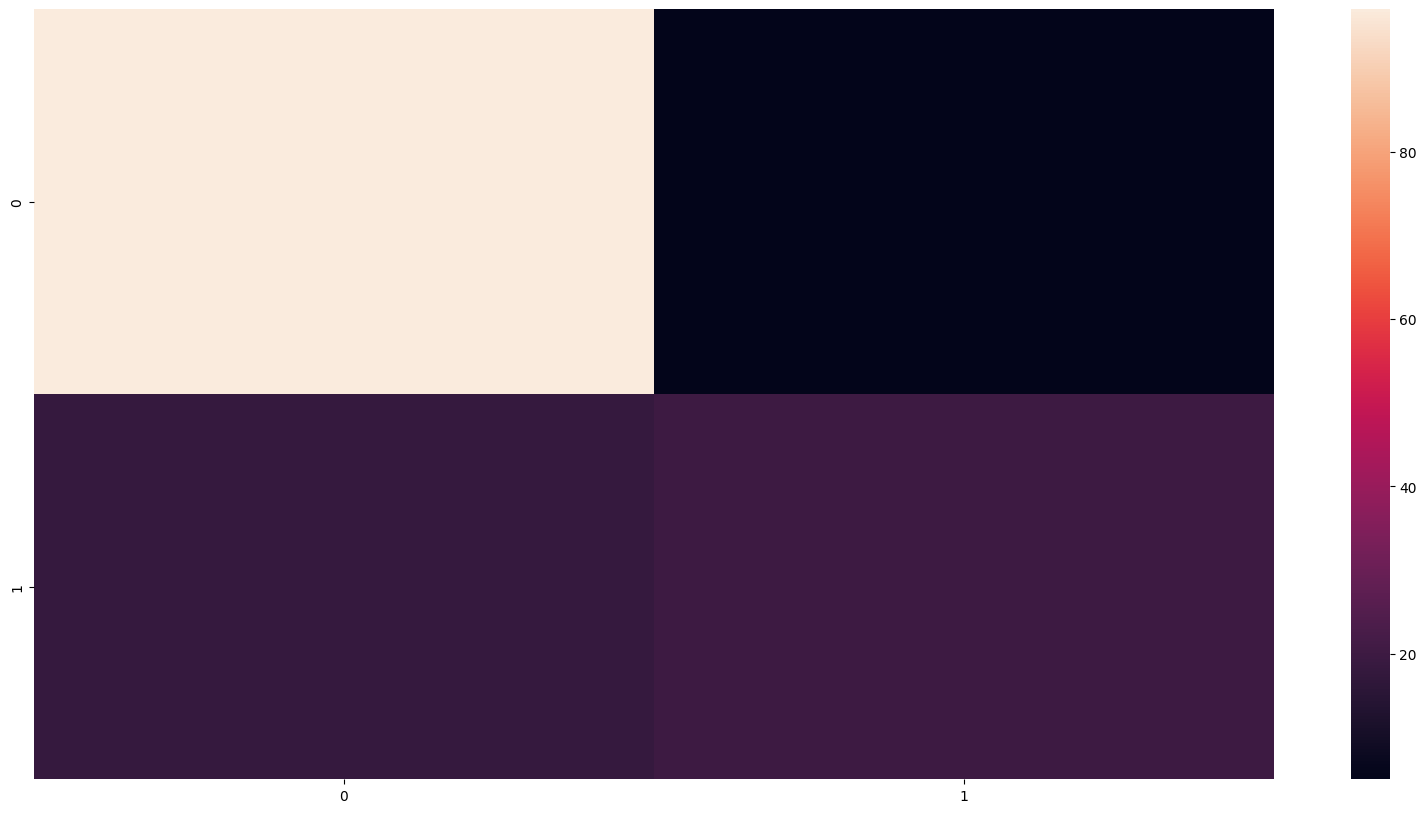

In [47]:
yp = lr.predict(x_test)
c = confusion_matrix(y_test,yp)
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(c,ax=ax)